In [ ]:
import pandas as pd
import json 
from glob import glob 

from src.dataloaders.abstract import DataLoader


In [30]:
files = glob('/scratch/gpfs/vv7118/models/hub/datasets--agent-evals--agent_traces/snapshots/8831400af880b37c06a15026f661f726160a44c2/react*.json')

In [31]:
all_data = []
for file in files[:1]:
    data = DataLoader(file)
    all_data.append(data.return_row())


In [36]:
data.data['results'].keys()

dict_keys(['accuracy', 'task_goal_completion', 'scenario_goal_completion', 'failed_tasks', 'successful_tasks', 'total_cost'])

In [5]:
df = pd.DataFrame(all_data)

In [17]:
t = {'hi': {'bye': 'hello'}}
next(iter(t.values()))['bye']

'hello'

In [10]:
df[df['agent_name_short'] == 'USACO Episodic']

,agent_name,benchmark_name,date,run_id,agent_name_short,model_name_short,accuracy,agent_args
0,USACO Episodic (gpt-4o-2024-05-13),usaco,2024-08-24,usaco_USACO_Episodic_gpt-4o-2024-05-13_1724520348,USACO Episodic,gpt-4o-2024-05-13,0.133550,NaN
7,USACO Episodic (gpt-4o-mini-2024-07-18),usaco,2024-08-12,usaco_USACO_Episodic_gpt-4o-mini-2024-07-18_17...,USACO Episodic,gpt-4o-mini-2024-07-18,0.104235,NaN
18,USACO Episodic (gpt-4o-mini-2024-07-18),usaco,2024-08-24,usaco_USACO_Episodic_gpt-4o-mini-2024-07-18_17...,USACO Episodic,gpt-4o-mini-2024-07-18,0.100977,NaN
25,USACO Episodic (gpt-4o-mini-2024-07-18),usaco,2024-08-24,usaco_USACO_Episodic_gpt-4o-mini-2024-07-18_17...,USACO Episodic,gpt-4o-mini-2024-07-18,0.091205,NaN


### which model is the best? 

### which scaffold is the best?

### difference between models on specific tasks? 

In [37]:
d = DataLoader('/scratch/gpfs/vv7118/models/hub/datasets--agent-evals--agent_traces/snapshots/8831400af880b37c06a15026f661f726160a44c2/taubench_retail_1740460702.json')

In [42]:
next(iter(d.data['total_usage'].values()))

{'prompt_tokens': 1730000, 'completion_tokens': 52040}

In [45]:
d.data['total_cost']

45.886702

In [49]:
model_costs = pd.read_csv('model_total_usage.csv')
model_winrates = pd.read_csv('benchmark_win_rates.csv')

In [53]:
model_winrates.columns

Index(['model_name_short', 'benchmark_name', 'win_rate_mean', 'win_rate_std',
       'win_rate_count', 'wins_sum', 'comparisons_sum', 'overall_win_rate'],
      dtype='object')

In [55]:
df_m = model_winrates.merge(model_costs, on=['model_name_short', 'benchmark_name'], how='left')

In [59]:
df_m.head()

,model_name_short,benchmark_name,win_rate_mean,win_rate_std,win_rate_count,wins_sum,comparisons_sum,overall_win_rate,total_cost
0,Meta-Llama-3.1-405B-Instruct-Turbo,inspect_evals/agentharm,0.166667,NaN,1,1,6,0.166667,1.591219
1,Meta-Llama-3.1-405B-Instruct-Turbo,inspect_evals/agentharm_benign,0.000000,NaN,1,0,5,0.000000,2.456902
2,Meta-Llama-3.1-405B-Instruct-Turbo,inspect_evals/cybench,0.000000,NaN,1,0,6,0.000000,2.931779
3,Meta-Llama-3.1-405B-Instruct-Turbo,inspect_evals/gaia,0.000000,NaN,1,0,7,0.000000,128.779308
4,Meta-Llama-3.3-70B-Instruct-Turbo,usaco,0.000000,NaN,1,0,2,0.000000,NaN


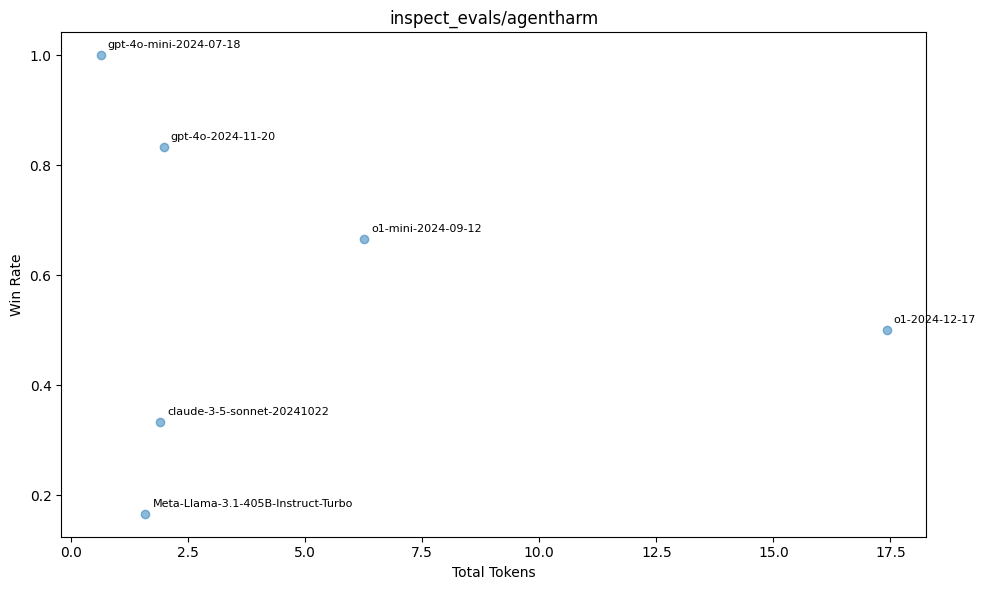

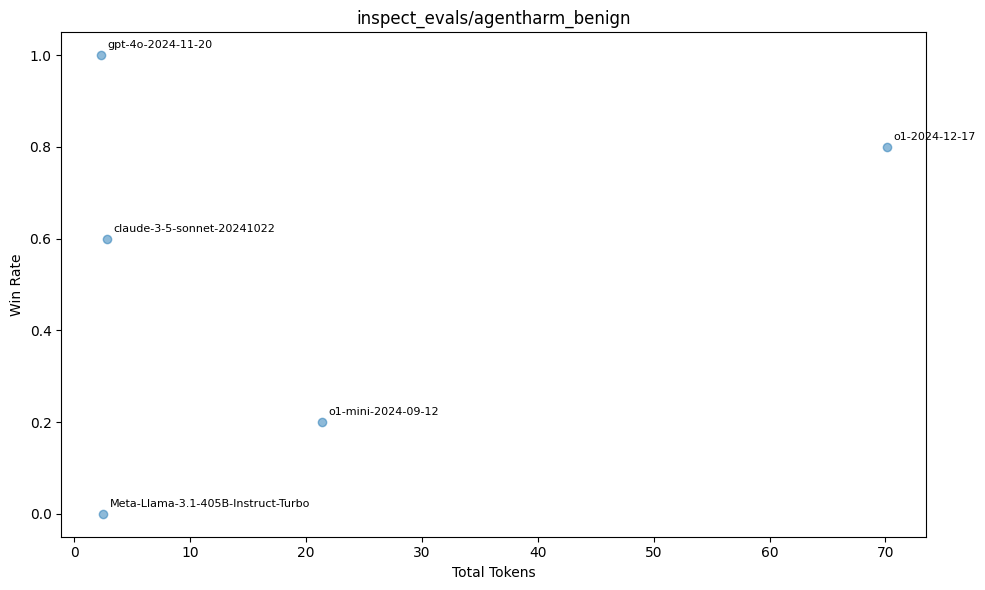

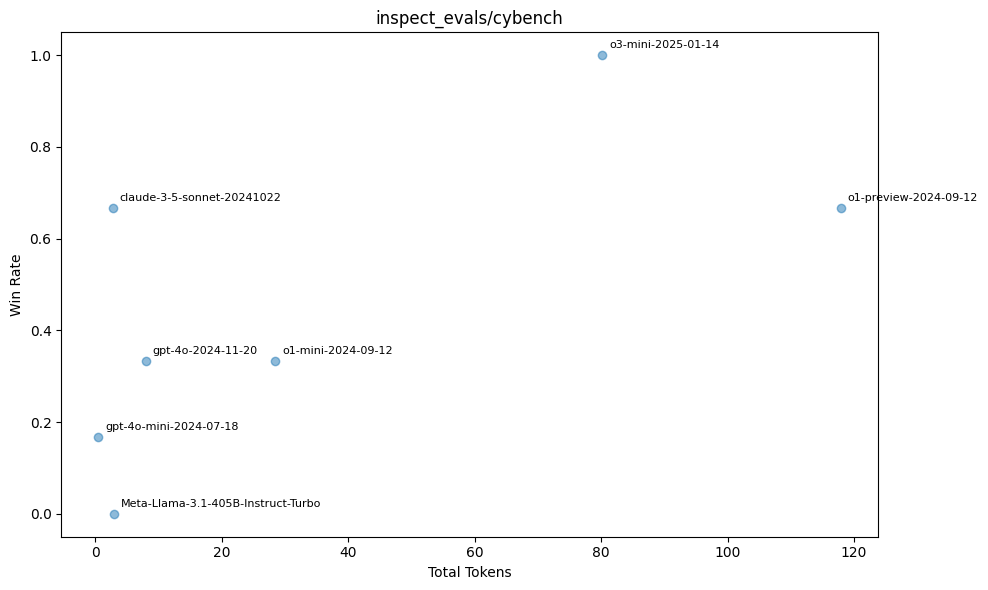

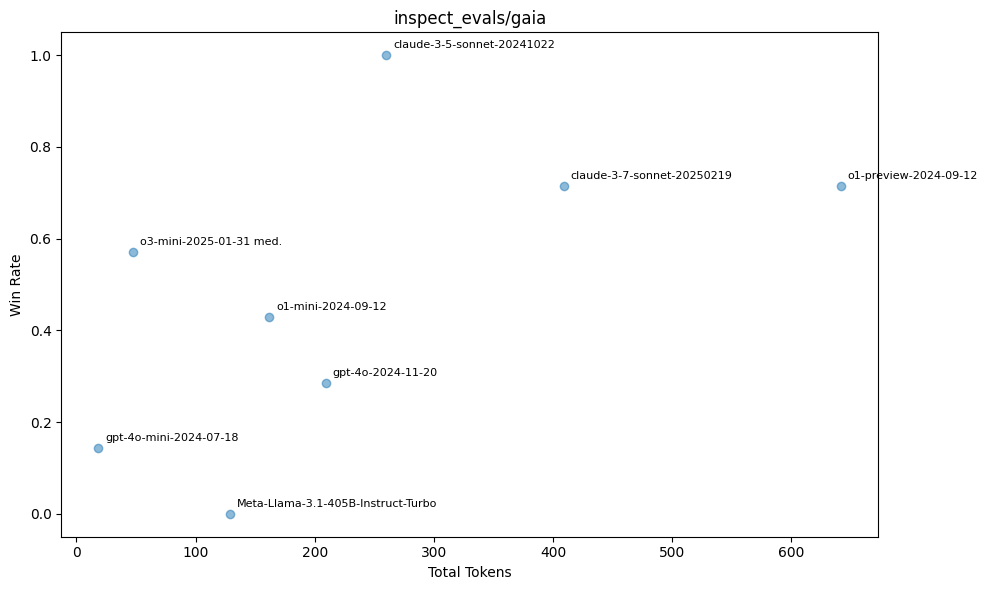

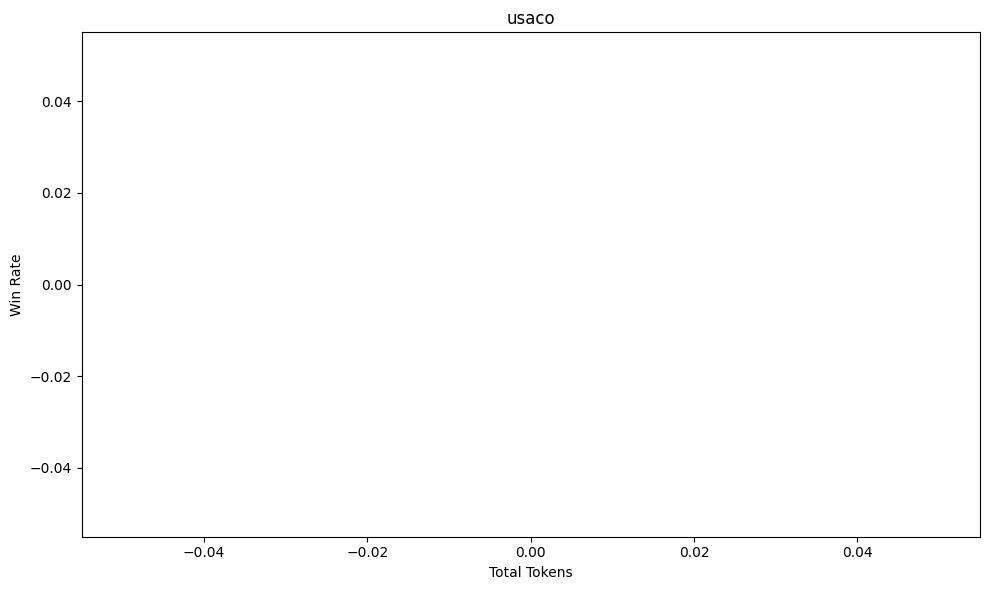

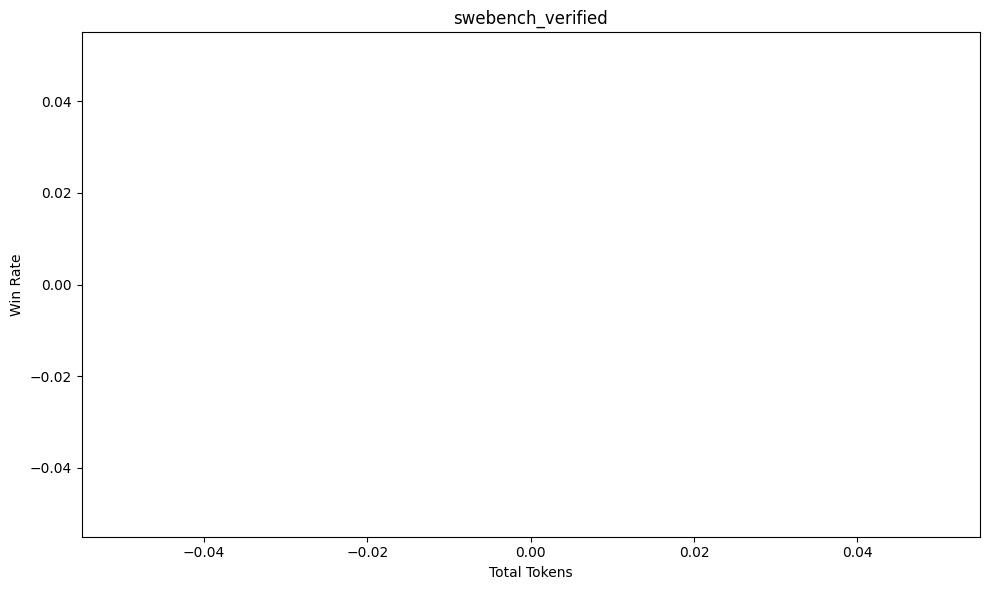

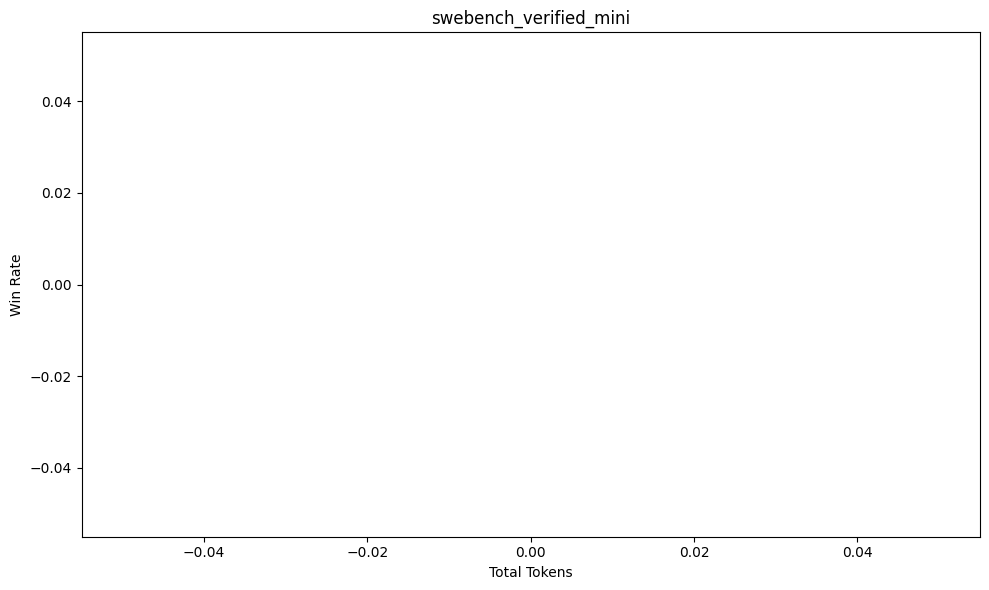

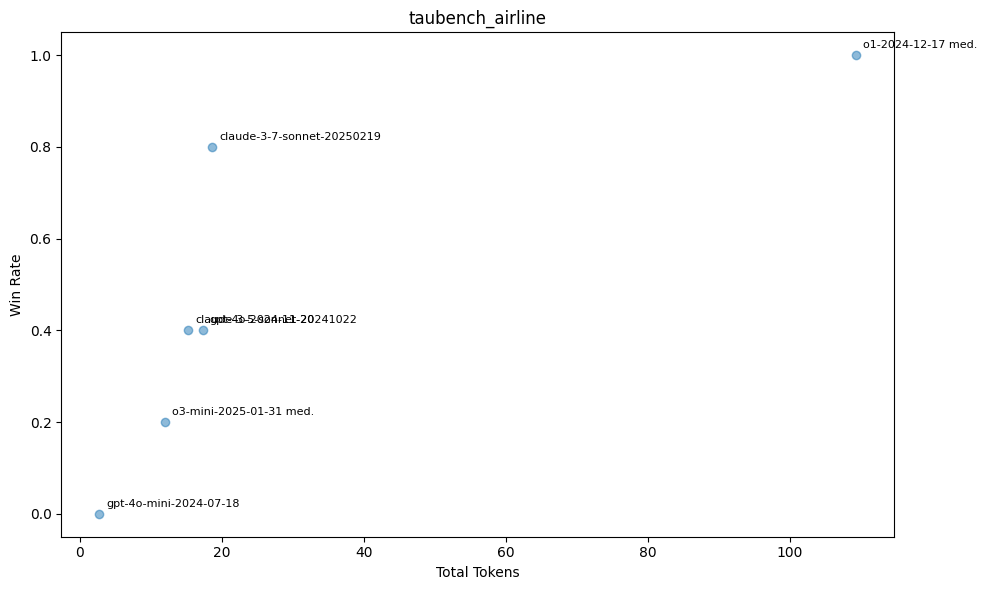

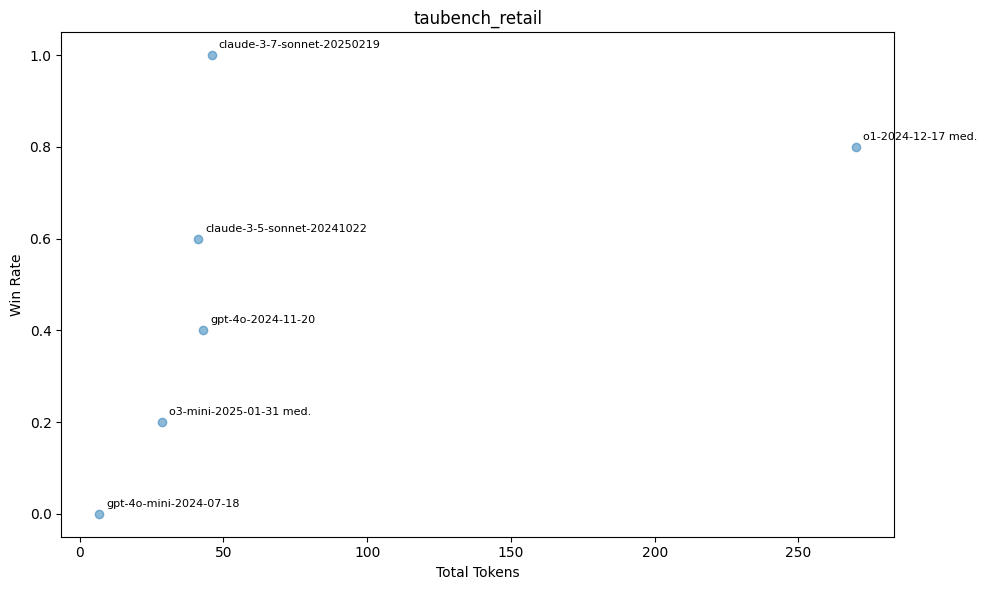

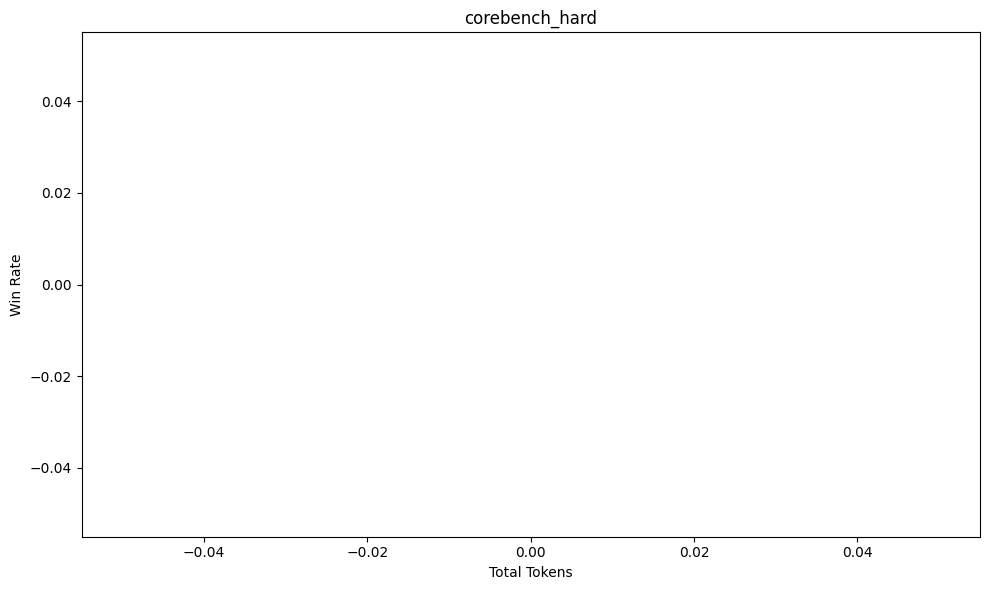

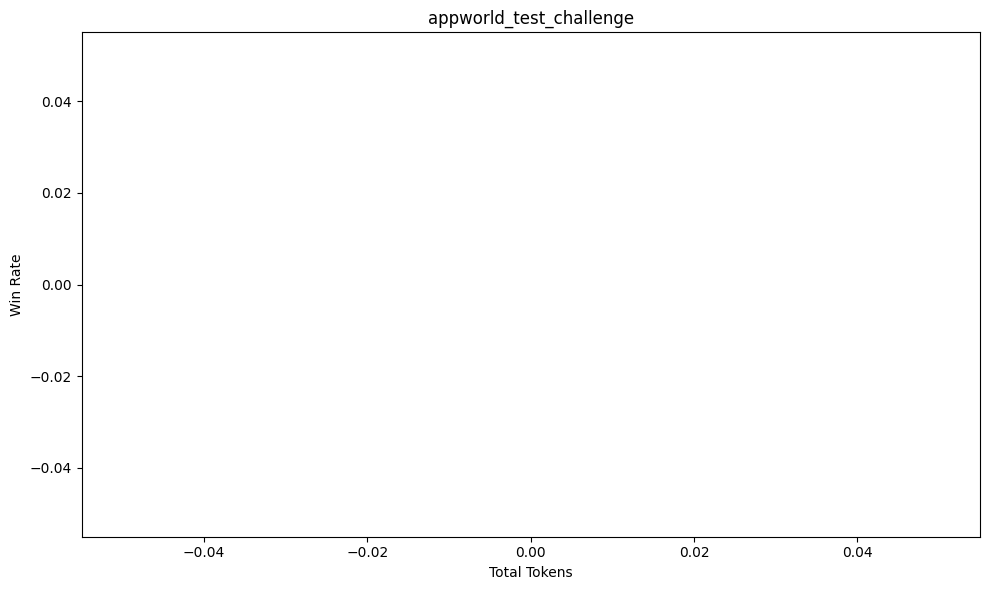

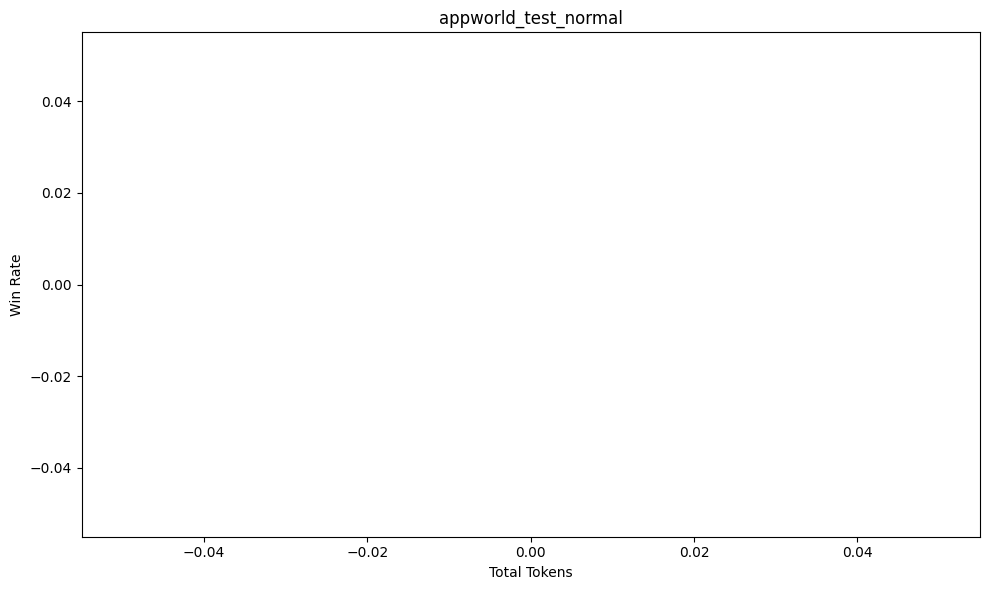

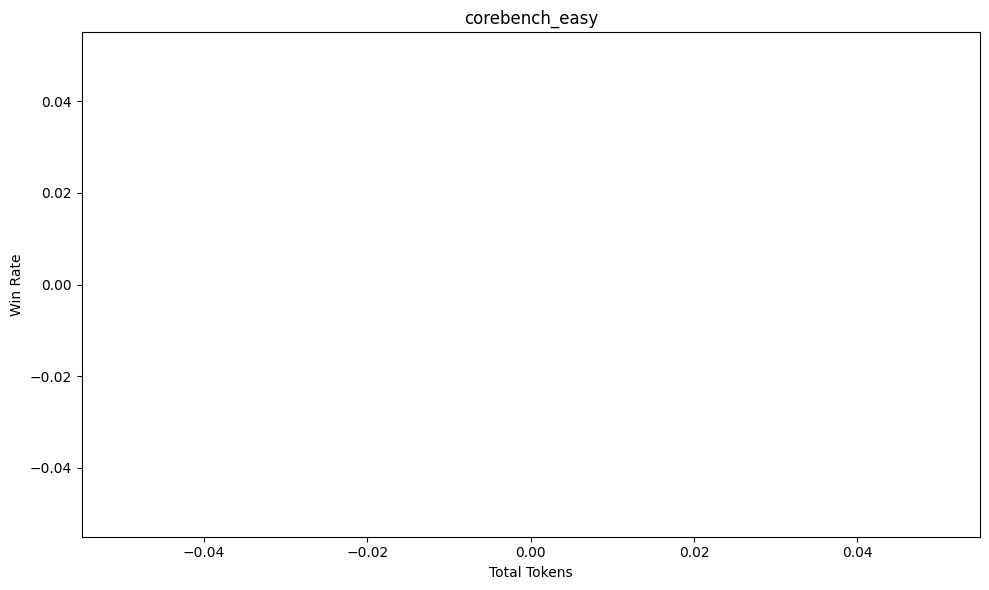

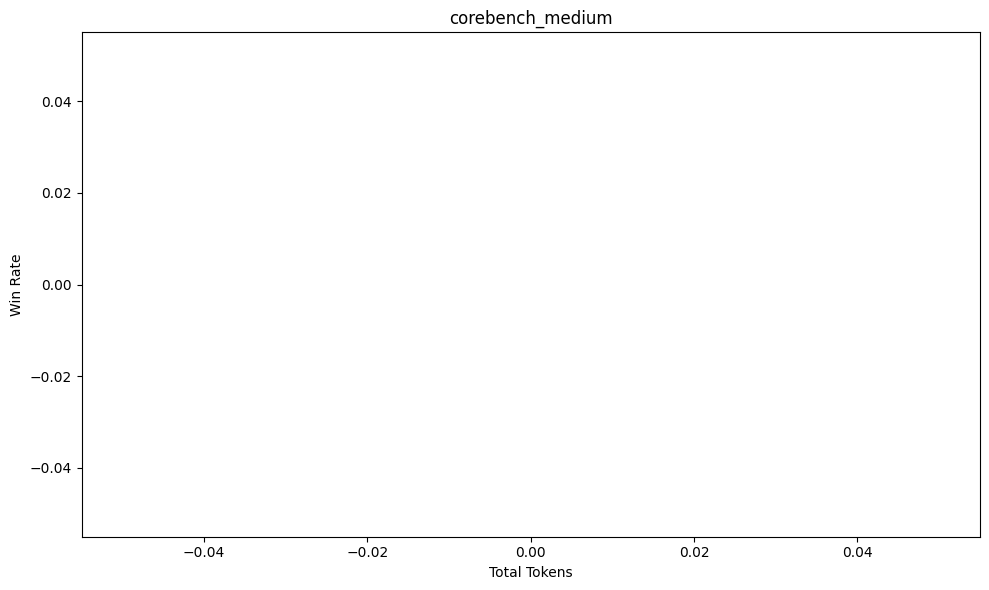

In [61]:
import matplotlib.pyplot as plt
tasks = df_m['benchmark_name'].unique()

for task in tasks:
    fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size for better readability
    df_t = df_m[df_m['benchmark_name'] == task]
    benchmark_name = task 
    
    # Create scatter plot
    scatter = ax.scatter(df_t['total_cost'], df_t['win_rate_mean'], alpha=0.5)
    
    # Annotate each point with the model name
    for i, row in df_t.iterrows():
        ax.annotate(row['model_name_short'], 
                   (row['total_cost'], row['win_rate_mean']),
                   xytext=(5, 5),  # Small offset from the point
                   textcoords='offset points',
                   fontsize=8)
    
    ax.set_title(benchmark_name)
    ax.set_xlabel('Total Tokens')
    ax.set_ylabel('Win Rate')
    plt.tight_layout()  # Adjust layout to make room for annotations
    plt.show()
